In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import matplotlib.colors as mcolors
import datetime
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm

/home/kit/imktro/gj5173/anaconda3/envs/newenvi4/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
#data import - era5
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era
ds_era5_06_29 = ds_era.fields[716,2,260:40:-1,720:1200]


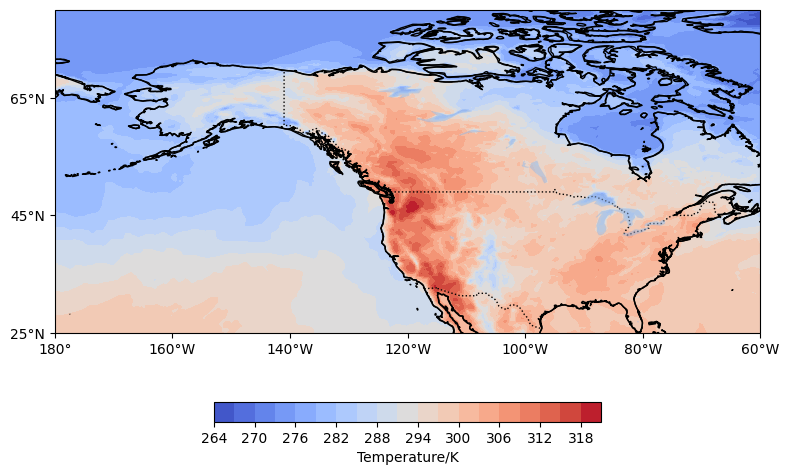

In [3]:


#ERA5 plots

#lat = ds_fcn_21['phony_dim_4']
#lon = ds_fcn_21['phony_dim_5']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)


ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contourf(x,y,ds_era5_06_29,cmap='coolwarm',levels=20)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour1, ax=ax, label='Temperature/K',orientation='horizontal',shrink=0.5)


# Set plot title and labels
#plt.title('T2m_2021-06-29-00:00UTC_ERA5')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

#plt.savefig('T2m_2021-06-15_ERA5.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
#plt.show()

In [4]:
#ECMWF
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_cf_\d{8}_\d{2}_sfc\.nc'

files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
files

data_ec = []
for file in files:
    file_path = os.path.join(directory, file)
    # Extract the date from the filename
    #date_str = re.search(r'\d{8}_\d{2}', file).group(0)
    #date = datetime.datetime.strptime(date_str, '%Y%m%d_%H').date()
    # Read the file and extract the desired variable
    ds = xr.open_dataset(file_path)
    variable_data = ds['t2m'] 

    #time_coord = xr.DataArray([date], dims='time1', coords={'time1': [date]})
    #variable_data = variable_data.expand_dims(dim='time1')
    #variable_data = variable_data.assign_coords(time=time_coord)

    data_ec.append(variable_data)

#combined_data = xr.concat(data, dim='time1')
#combined_data
#combined_data[0,:,119,234]
np.shape(data_ec)

#ds_ecmwf.t2m[0,79:159,194:274]
data_array_ec =xr.DataArray(data_ec)


In [5]:
start_index = 56
step_size = 1
num_iterations =15
ec_values=[]
for i in range(num_iterations):
    ec_value =data_array_ec [(i+1) * step_size, start_index - i * step_size*4]
    ec_values.append(ec_value)
data_array_ec_values =xr.DataArray(ec_values)
#%store data_array_ec_values_cf
#np.shape(data_array_ec_values)

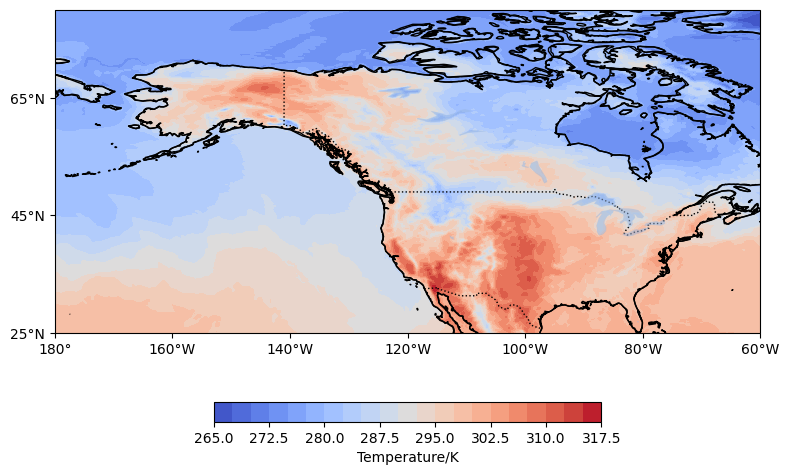

In [6]:
ds_ecmwf = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210614_00_sfc.nc')
ds_ecmwf
#ecmwf plots 

# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig3 = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax1 = fig2.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3 = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 

leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
lon_ec = ds_ecmwf['longitude']
lat_ec = ds_ecmwf['latitude']
                  
# Add map features
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.add_feature(cfeature.OCEAN, facecolor='w')


ax3.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax3.add_feature(cfeature.LAKES, alpha=0.5)
ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[676,2,260:40:-1,720:1200],cmap='jet',levels=20)
#phony_dim_4-lat phony_dim_5-lon phony_dim_0-leadtime(21) phony_dim_2-time 57(0:ground truth,intervel:6h,start from 2021.06.14 00UTC,) phony_dim_1-pertubated members phony_dim_3:variables
#assume time intervel in lead time is 3h
#lead time: 18 36 54 72
#time 2021.06.14-07.04UTC 00:00

#control forecast
contour3 = ax3.contourf(lon_ec,lat_ec,data_array_ec_values[0,:,:],cmap='coolwarm',levels=20)
#ds_fcn_ecmwf.isel(phony_dim_0 = 1, phony_dim_1 = 1,phony_dim_2 = 2,phony_dim_3=slice(None,None,-1)).forecast.plot()
#control forecast

# Add colorbar
cbar = plt.colorbar(contour3, ax=ax3, label='Temperature/K',orientation='horizontal',shrink=0.5)

# Set plot title and labels
#plt.title('Temperature Contour Map')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#cbar = plt.colorbar(contour, ax=ax1, label='Temperature/K',orientation='horizontal',shrink=0.5)
#plt.title('T2m_2021-06-15-00:00UTC_ECMWF')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots/T2m_2021-06-15_ECMWF.png', bbox_inches='tight',dpi=100)
# Show the pl

In [7]:
#fcn_ecmwf
directory_fcn_ec = '/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/'
filename_pattern_fcn_ec = r'\d{8}_00_backtransformed\.nc'
#fc_cf_20210615_00_sfc.nc
#20210704_00_backtransformed.nc
files_fcn_ec = sorted([f for f in os.listdir(directory_fcn_ec) if re.match(filename_pattern_fcn_ec, f)])
files_fcn_ec

data_fcn_ec = []
for file1 in files_fcn_ec:
    file_path_fcn_ec = os.path.join(directory_fcn_ec, file1)
    # Extract the date from the filename
    date_str = re.search(r'\d{8}', file1).group(0)
    
    date = datetime.datetime.strptime(date_str, '%Y%m%d').date()
    # Read the file and extract the desired variable
    ds_fcn_ec = xr.open_dataset(file_path_fcn_ec)
    variable_data_fcn_ec =  ds_fcn_ec['forecast'][50,:,2,:,:]
    data_fcn_ec.append(variable_data_fcn_ec)

data_array_fcn_ec =xr.DataArray(data_fcn_ec)   

In [8]:

start_index = 56
step_size = 1
num_iterations =15
fcn_ec_values=[]
for i in range(num_iterations):
    fcn_ec_value = data_array_fcn_ec[(i+1) * step_size, start_index - i * step_size*4,:,:]
    fcn_ec_values.append(fcn_ec_value)
data_array_fcn_ec_values =xr.DataArray(fcn_ec_values)
np.shape(data_array_fcn_ec_values)
#data_array_fcn_ec_values[14] = data_array_ec_values[14]
#replace the missing data

(15, 220, 480)

In [9]:
#fcn_era5
ds_fcn_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era
mean_fcn_era = ds_fcn_era.forecast[:,0,:,2,:,:]
#mean_fcn_era
start_index = 56
step_size = 1
num_iterations =15
fcn_era_values=[]
for i in range(num_iterations):
    fcn_era_value = mean_fcn_era[(i+1) * step_size, start_index - i * step_size*4,:,:]
    fcn_era_values.append(fcn_era_value)
data_array_fcn_era_values=xr.DataArray(fcn_era_values)

In [10]:
np.shape(data_array_fcn_era_values)

(15, 220, 480)

In [11]:
#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1_ec_14 = ds_era5_06_29.values
variable2_ec_14 = data_array_ec_values[0,221:0:-1,0:480].values
variable3_ec_14 = data_array_fcn_ec_values[0,::-1,:].values
variable4_ec_14 = data_array_fcn_era_values[0,::-1,:].values
np.shape(variable3_ec_14)

#np.shape(variable2_1) 5 
variable1_ec_7 = ds_era5_06_29.values
variable2_ec_7 = data_array_ec_values[7,221:0:-1,0:480].values
variable3_ec_7 = data_array_fcn_ec_values[7,::-1,:].values
variable4_ec_7 = data_array_fcn_era_values[7,::-1,:].values
variable1_ec_3 = ds_era5_06_29.values
variable2_ec_3 = data_array_ec_values[11,221:0:-1,0:480].values
variable3_ec_3 = data_array_fcn_ec_values[11,::-1,:].values
variable4_ec_3 = data_array_fcn_era_values[11,::-1,:].values

In [12]:
batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

difference_ec_14 = np.empty((220, 480))
for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        batch_variable1_ec_14 = variable1_ec_14[i:i + batch_size, j:j + batch_size]
        batch_variable2_ec_14 = variable2_ec_14[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference_ec_14 =  batch_variable2_ec_14-batch_variable1_ec_14 
        
        # Update the difference array with the current batch_difference
        difference_ec_14[i:i + batch_size, j:j + batch_size] = batch_difference_ec_14

In [13]:
batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

difference_fcn_ec_14 = np.empty((220, 480))
for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        batch_variable1_ec_14 = variable1_ec_14[i:i + batch_size, j:j + batch_size]
        batch_variable3_ec_14 = variable3_ec_14[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference_fcn_ec_14 = batch_variable3_ec_14 - batch_variable1_ec_14 
        
        # Update the difference array with the current batch_difference
        difference_fcn_ec_14[i:i + batch_size, j:j + batch_size] = batch_difference_fcn_ec_14

In [14]:
batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

difference_fcn_era_14 = np.empty((220, 480))
for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        batch_variable1_ec_14 = variable1_ec_14[i:i + batch_size, j:j + batch_size]
        batch_variable4_ec_14 = variable4_ec_14[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference_fcn_era_14 = batch_variable4_ec_14 - batch_variable1_ec_14 
        
        # Update the difference array with the current batch_difference
        difference_fcn_era_14[i:i + batch_size, j:j + batch_size] = batch_difference_fcn_era_14

In [15]:
difference_ec_7 = np.empty((220, 480))
for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        batch_variable1_ec_7 = variable1_ec_7[i:i + batch_size, j:j + batch_size]
        batch_variable2_ec_7 = variable2_ec_7[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference_ec_7 = batch_variable2_ec_7 - batch_variable1_ec_7 
        
        # Update the difference array with the current batch_difference
        difference_ec_7[i:i + batch_size, j:j + batch_size] = batch_difference_ec_7

In [16]:
difference_fcn_ec_7 = np.empty((220, 480))
for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        batch_variable1_ec_7 = variable1_ec_7[i:i + batch_size, j:j + batch_size]
        batch_variable3_ec_7 = variable3_ec_7[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference_fcn_ec_7 = batch_variable3_ec_7 - batch_variable1_ec_7
        
        # Update the difference array with the current batch_difference
        difference_fcn_ec_7[i:i + batch_size, j:j + batch_size] = batch_difference_fcn_ec_7

In [17]:
difference_fcn_era_7 = np.empty((220, 480))
for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        batch_variable1_ec_7 = variable1_ec_7[i:i + batch_size, j:j + batch_size]
        batch_variable4_ec_7 = variable4_ec_7[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference_fcn_era_7 = batch_variable4_ec_7 - batch_variable1_ec_7 
        
        # Update the difference array with the current batch_difference
        difference_fcn_era_7[i:i + batch_size, j:j + batch_size] = batch_difference_fcn_era_7

In [18]:
difference_ec_3 = np.empty((220, 480))
for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        batch_variable1_ec_3 = variable1_ec_3[i:i + batch_size, j:j + batch_size]
        batch_variable2_ec_3 = variable2_ec_3[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference_ec_3 = batch_variable2_ec_3 - batch_variable1_ec_3 
        
        # Update the difference array with the current batch_difference
        difference_ec_3[i:i + batch_size, j:j + batch_size] = batch_difference_ec_3

In [19]:
difference_fcn_ec_3 = np.empty((220, 480))
for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        batch_variable1_ec_3 = variable1_ec_3[i:i + batch_size, j:j + batch_size]
        batch_variable3_ec_3 = variable3_ec_3[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference_fcn_ec_3 =  batch_variable3_ec_3 - batch_variable1_ec_3
        
        # Update the difference array with the current batch_difference
        difference_fcn_ec_3[i:i + batch_size, j:j + batch_size] = batch_difference_fcn_ec_3

In [20]:
difference_fcn_era_3 = np.empty((220, 480))
for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        batch_variable1_ec_3 = variable1_ec_3[i:i + batch_size, j:j + batch_size]
        batch_variable4_ec_3 = variable4_ec_3[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference_fcn_era_3 = batch_variable4_ec_3 - batch_variable1_ec_3 
        
        # Update the difference array with the current batch_difference
        difference_fcn_era_3[i:i + batch_size, j:j + batch_size] = batch_difference_fcn_era_3

NameError: name 'difference' is not defined

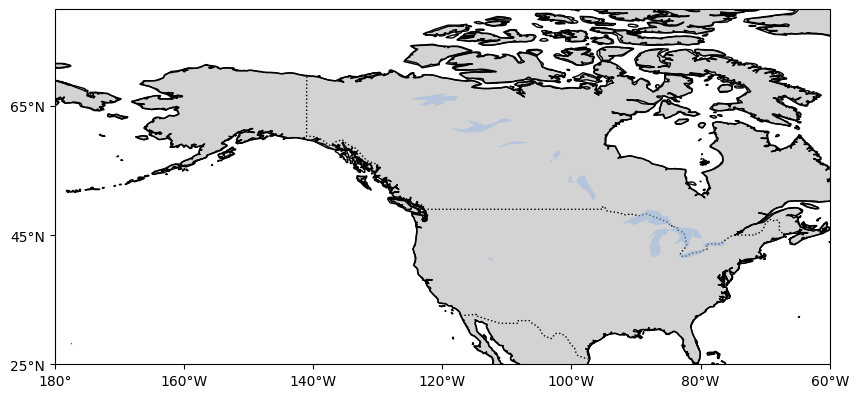

In [21]:


#ERA5 plots

#lat = ds_fcn_21['phony_dim_4']
#lon = ds_fcn_21['phony_dim_5']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)


ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contourf(x,y,difference,cmap='coolwarm',levels=20)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour1, ax=ax, label='Temperature/K',orientation='horizontal',shrink=0.5)


# Set plot title and labels
#plt.title('T2m_2021-06-29-00:00UTC_ERA5')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

#plt.savefig('T2m_2021-06-15_ERA5.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
#plt.show()

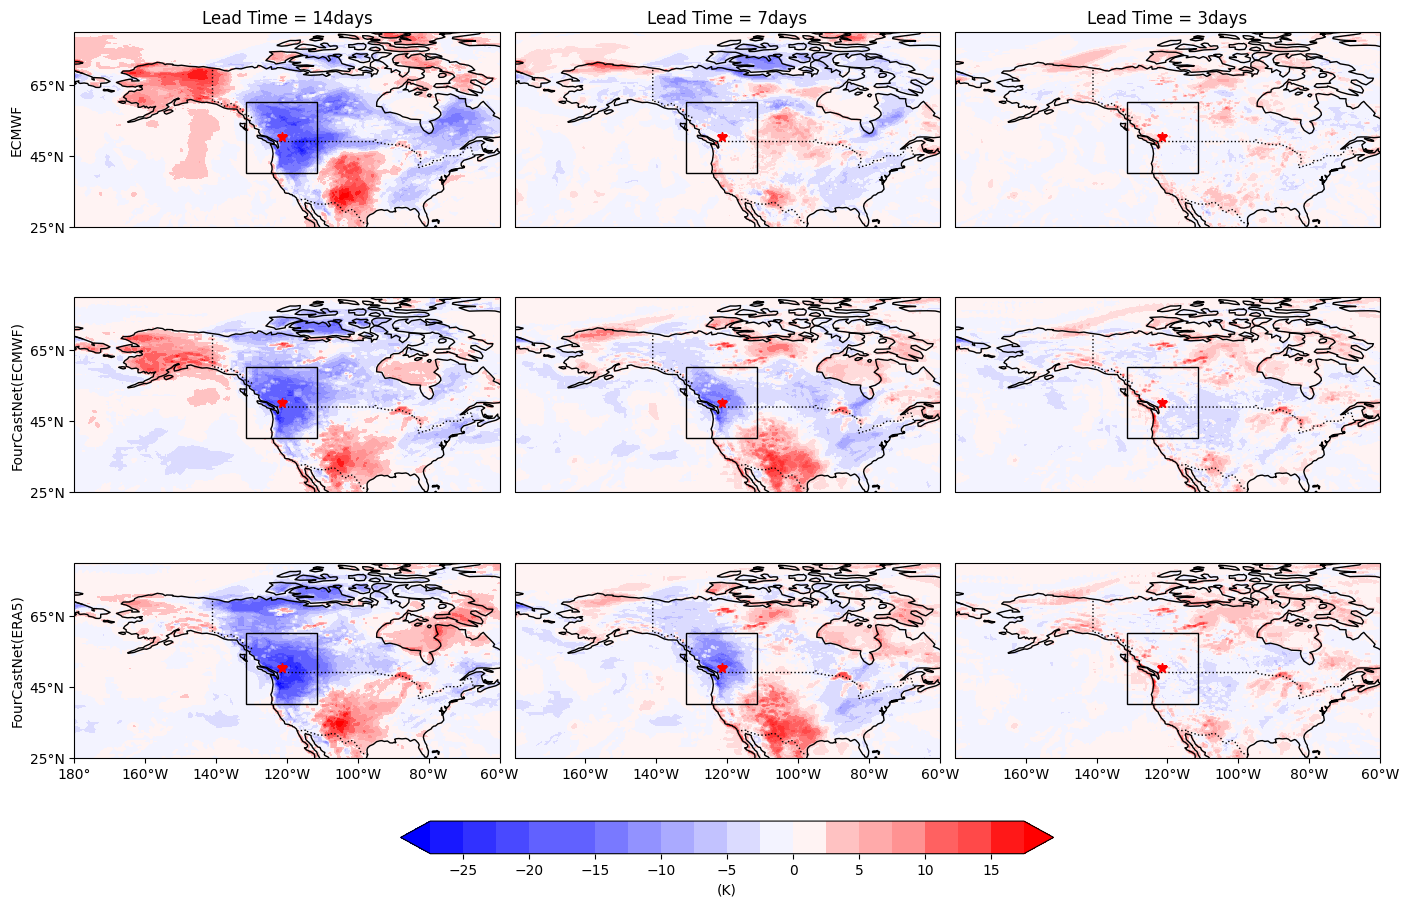

In [35]:
#check if the abnormal sst problem is caused by clor bar settings


#create plots with  DIFFERENCE  9 subplots

# Create a new subplot for additional plots
fig, axs = plt.subplots(3, 3, figsize=(14, 13), subplot_kw={'projection': ccrs.PlateCarree()})



#fig.suptitle('T2m_2021-06-15-18:00UTC', fontsize=12)
#levels = np.linspace(250, 328, 20)
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = axs

cmap = mcolors.LinearSegmentedColormap.from_list(name='red_white_blue', 
                                                 colors =[(0, 0, 1), 
                                                          (1, 1., 1), 
                                                          (1, 0, 0)],
                                                 N=22,
                                                 )

vmax = max(difference_ec_14.max(),difference_ec_7.max(), difference_ec_3.max(), difference_fcn_ec_14.max(),difference_fcn_ec_7.max(),difference_fcn_ec_3.max(),difference_fcn_era_14.max(),difference_fcn_era_7.max(),difference_fcn_era_3.max())
vmin = min(difference_ec_14.min(),difference_ec_7.min(), difference_ec_3.min(), difference_fcn_ec_14.min(),difference_fcn_ec_7.min(),difference_fcn_ec_3.min(),difference_fcn_era_14.min(),difference_fcn_era_7.min(),difference_fcn_era_3.min())
#vmax = difference_ec_14.max()
#vmin = difference_ec_14.min()
#cmap = plt.get_cmap('coolwarm')
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
#plot_kwargs = dict(cmap = "coolwarm", vmin=vmin, vmax=vmax,levels = 20)
#norm = mcolors.Normalize(-30,40)
#newcmp = ListedColormap(vals)
#cmap = mcolors.LinearSegmentedColormap.from_list("", ["blue","white","red"])
#cmap = ListedColormap(['red', 'white', 'blue'])
plot_kwargs = dict(cmap=cmap, norm = norm,levels = 20)
#cmap=cmap, norm=norm
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
red_point_lon = -121.50
red_point_lat = 50.25

rect = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_1 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_2 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_3 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_4 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_5 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_6 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_7 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_8 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')





ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax1.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

contour1 = ax1.contourf(x,y,difference_ec_14,**plot_kwargs,extend = 'both')
ax1.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax1.add_patch(rect)
#fourcastnet(ECMWF):FIRST:PERTUBED MEMBERS(50-CONTROL FORECAST),SECOND:LEAD TIME,THIRD:VARIABLES
#phony_dim_2: 21phony_dim_0: 51phony_dim_1: 57phony_dim_3: 220phony_dim_4: 480
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K', orientation='horizontal', shrink=0.5)
#ax1.set_title('Forecastnet(ECMWF)',loc='left')
ax1.set_title('Lead Time = 14days')
#ax1.set_xlabel('Longitude')
ax1.set_ylabel('ECMWF')



ax2.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax2.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
#ax2.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_title('Lead Time = 7days')
contour2 = ax2.contourf(x,y,difference_ec_7,**plot_kwargs)
ax2.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax2.add_patch(rect_1)
#FRIST DIMENSION:LEAD TIM7
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K', orientation='horizontal', shrink=0.5)
#ax2.set_title('ECMWF',loc='left')
#ax2.set_title('lead time = +42h',loc='right')
#ax2.set_xlabel('Longitude')
#ax2.set_ylabel('Latitude')

# Add more plots in the second subplot (ax[1])
# Example:
# ax[1].plot(x, y, 'r-', label='Plot 2')
# ax[1].set_xlabel('X-axis')
# ax[1].set_ylabel('Y-axis for Plot 2')



ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
#ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.set_title('Lead Time = 3days')
ax3.plot(red_point_lon, red_point_lat, 'r*', markersize=7)

contour3 = ax3.contourf(x,y,difference_ec_3,**plot_kwargs)
ax3.add_patch(rect_2)
#fourcastnet(ERA5):FIRST:TIME,SECOND:LEAD TIME,THIRD:P2RTURB MEMBERS
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K', orientation='horizontal', shrink=0.5)
#phony_dim_3: 21phony_dim_0: 21phony_dim_1: 51phony_dim_2: 57phony_dim_4: 220phony_dim_5: 480

#ax3.set_title('Forecastnet(ERA5)',loc='left')
#ax3.set_title('lead time = +42h',loc='right')

#ax3.set_xlabel('Longitude')
#ax3.set_ylabel('Latitude')

ax4.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.COASTLINE)
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.LAND, facecolor='lightgray')
ax4.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax4.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax4.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)
contour4 = ax4.contourf(x,y,difference_fcn_ec_14,**plot_kwargs)
ax4.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax4.add_patch(rect_3)
#era5: only first dimension needs to be changed, 2021.06.14:00:00-656
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K orientation='horizontal', shrink=0.5)
#ax4.set_title('ERA5',loc='left')
#ax4.set_xlabel('Longitude')
ax4.set_ylabel('FourCastNet(ECMWF)')
plt.tight_layout()


#cbar = fig.colorbar(contour1, ax=axs, extend = 'both',label='Temperature/K', orientation='vertical',shrink=0.5)
#fig.colorbar(pcm, ax=axs)
#plt.colorbar(ax[1, 0]) 

# Save the combined plot to a file
#plt.savefig('/home/kit/imk-tro/gj5173/plots/t2m_2021-06-15_18:00_changedbar.png', bbox_inches='tight', dpi=100)

# Show the combined plot
#plt.show()

ax5.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.COASTLINE)
ax5.add_feature(cfeature.BORDERS, linestyle=':')
ax5.add_feature(cfeature.LAND, facecolor='lightgray')
ax5.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax4.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax5.xaxis.set_major_formatter(lon_formatter)
ax5.yaxis.set_major_formatter(lat_formatter)
contour4 = ax5.contourf(x,y,difference_fcn_ec_7,**plot_kwargs)
ax5.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax5.add_patch(rect_4)
#era5: only first dimension needs to be changed, 2021.06.14:00:00-656
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K orientation='horizontal', shrink=0.5)
#ax4.set_title('ERA5',loc='left')
#ax4.set_xlabel('Longitude')
#ax4.set_ylabel('Latitude')
plt.tight_layout()

ax6.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.BORDERS, linestyle=':')
ax6.add_feature(cfeature.LAND, facecolor='lightgray')
ax6.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax4.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax6.xaxis.set_major_formatter(lon_formatter)
ax6.yaxis.set_major_formatter(lat_formatter)
contour4 = ax6.contourf(x,y,difference_fcn_ec_3,**plot_kwargs)
ax6.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax6.add_patch(rect_5)

ax7.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax7.add_feature(cfeature.COASTLINE)
ax7.add_feature(cfeature.BORDERS, linestyle=':')
ax7.add_feature(cfeature.LAND, facecolor='lightgray')
ax7.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax7.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax7.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax7.xaxis.set_major_formatter(lon_formatter)
ax7.yaxis.set_major_formatter(lat_formatter)
ax7.set_ylabel('FourCastNet(ERA5)')
contour4 = ax7.contourf(x,y,difference_fcn_era_14,**plot_kwargs)
ax7.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax7.add_patch(rect_6)

ax8.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax8.add_feature(cfeature.COASTLINE)
ax8.add_feature(cfeature.BORDERS, linestyle=':')
ax8.add_feature(cfeature.LAND, facecolor='lightgray')
ax8.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax8.set_xticks(np.arange(leftlon+20,rightlon+10,20), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax8.xaxis.set_major_formatter(lon_formatter)
ax8.yaxis.set_major_formatter(lat_formatter)
contour4 = ax8.contourf(x,y,difference_fcn_era_7,**plot_kwargs)
ax8.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax8.add_patch(rect_7)


ax9.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax9.add_feature(cfeature.COASTLINE)
ax9.add_feature(cfeature.BORDERS, linestyle=':')
ax9.add_feature(cfeature.LAND, facecolor='lightgray')
ax9.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax9.set_xticks(np.arange(leftlon+20,rightlon+10,20), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax9.xaxis.set_major_formatter(lon_formatter)
ax9.yaxis.set_major_formatter(lat_formatter)
contour4 = ax9.contourf(x,y,difference_fcn_era_3,**plot_kwargs)
ax9.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax9.add_patch(rect_8)

#norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
#norm = mcolors.TwoSlopeNorm(vcenter=0)
#pc = plt.pcolormesh(axs, norm=norm, cmap=cmap)
#cb = plt.colorbar(pc,orientation='horizontal',shrink=0.5,label='Temperature/K',extend='both')
#cbar.set_ticks()
#cb.add_lines(CS) 
#im = ax9.pcolormesh(x, y, difference_fcn_era_7, cmap=cmap, norm=norm)
#fig.colorbar(im, ax=axs)
#tick_positions = [-abs(vmin), -abs(vmin)/2, 0, abs(vmax)/2, abs(vmax)]
#tick_labels = [f'{val:.1f}' for val in tick_positions]
cbar = plt.colorbar(contour1, ax=axs, orientation='horizontal', cmap=cmap, norm=norm, shrink=0.5,label='(K)',pad = 0.05,extend = 'both')
plt.savefig('/home/kit/imk-tro/gj5173/06.09_modified-plts/3*3_difference_t2m.png', bbox_inches='tight',dpi=100)
#cbar.set_ticklabels(tick_labels)
#plt.colorbar()
#cbar = fig.colorbar(contour1, ax=axs, extend = 'both',label='Temperature/K', orientation='vertical',shrink=0.5)

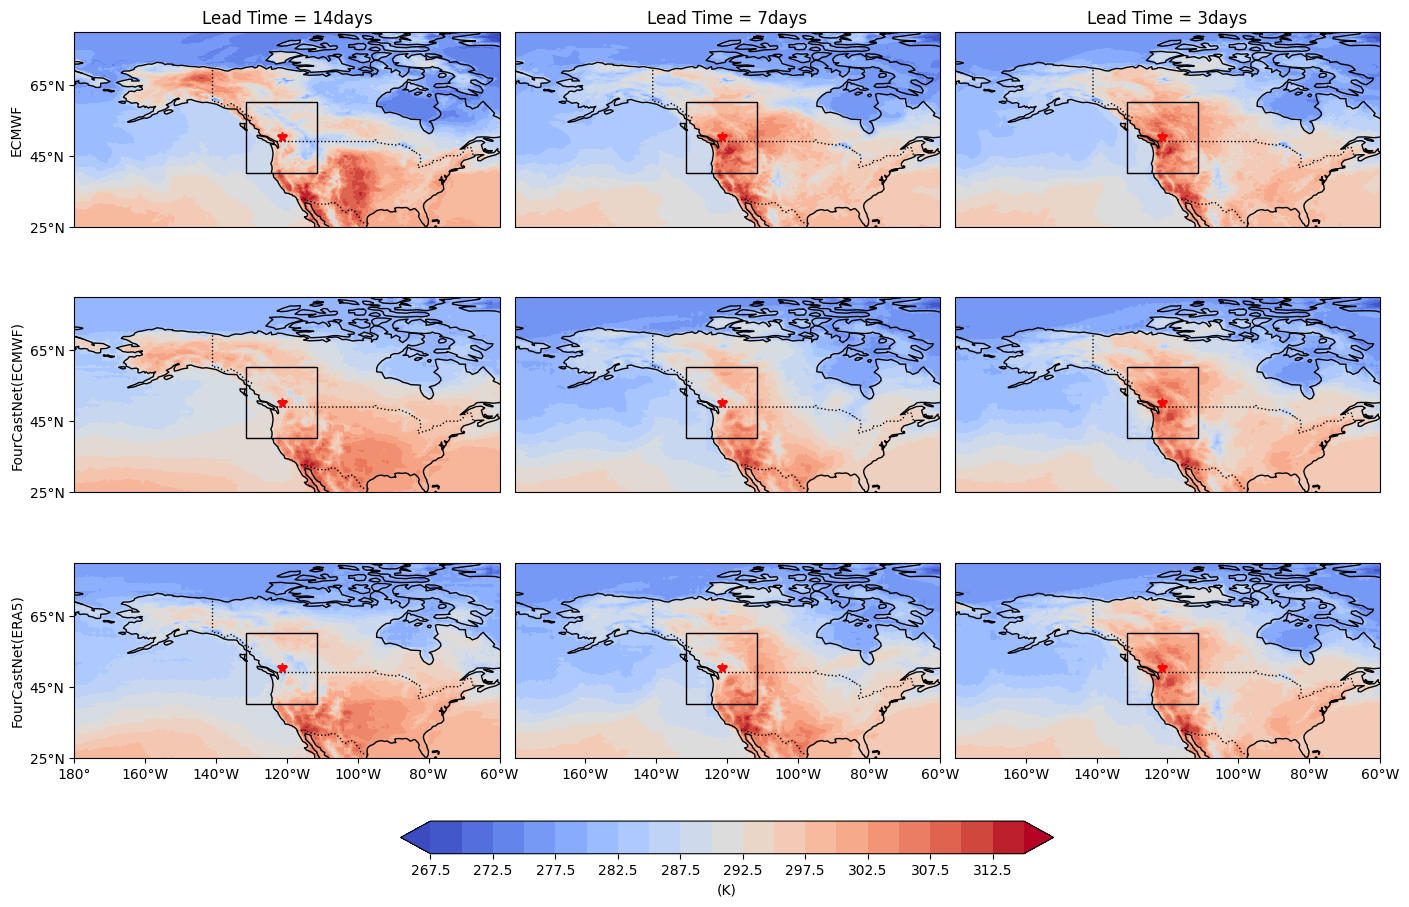

In [40]:
#check if the abnormal sst problem is caused by clor bar settings


#create t2m plots with 9 subplots

# Create a new subplot for additional plots
fig, axs = plt.subplots(3, 3, figsize=(14, 13), subplot_kw={'projection': ccrs.PlateCarree()})



#fig.suptitle('T2m_2021-06-15-18:00UTC', fontsize=12)
#levels = np.linspace(250, 328, 20)
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = axs

cmap = 'coolwarm'
                                                 

#vmax = max(difference_ec_14.max(),difference_ec_7.max(), difference_ec_3.max(), difference_fcn_ec_14.max(),difference_fcn_ec_7.max(),difference_fcn_ec_3.max(),difference_fcn_era_14.max(),difference_fcn_era_7.max(),difference_fcn_era_3.max())
#vmin = min(difference_ec_14.min(),difference_ec_7.min(), difference_ec_3.min(), difference_fcn_ec_14.min(),difference_fcn_ec_7.min(),difference_fcn_ec_3.min(),difference_fcn_era_14.min(),difference_fcn_era_7.min(),difference_fcn_era_3.min())
#vmax = difference_ec_14.max()
#vmin = difference_ec_14.min()
#cmap = plt.get_cmap('coolwarm')
#norm = TwoSlopeNorm(vmin=variable2_ec_14.min(), vmax=variable2_ec_14.max() )
#plot_kwargs = dict(cmap = "coolwarm", vmin=vmin, vmax=vmax,levels = 20)
#norm = mcolors.Normalize(-30,40)
#newcmp = ListedColormap(vals)
#cmap = mcolors.LinearSegmentedColormap.from_list("", ["blue","white","red"])
#cmap = ListedColormap(['red', 'white', 'blue'])
plot_kwargs = dict(cmap=cmap,levels = 20)
#cmap=cmap, norm=norm
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

red_point_lon = -121.50
red_point_lat = 50.25

rect = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_1 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_2 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_3 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_4 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_5 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_6 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_7 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
rect_8 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')









ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax1.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

contour1 = ax1.contourf(x,y,variable2_ec_14 ,**plot_kwargs,extend ='both')
ax1.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax1.add_patch(rect)
#fourcastnet(ECMWF):FIRST:PERTUBED MEMBERS(50-CONTROL FORECAST),SECOND:LEAD TIME,THIRD:VARIABLES
#phony_dim_2: 21phony_dim_0: 51phony_dim_1: 57phony_dim_3: 220phony_dim_4: 480
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K', orientation='horizontal', shrink=0.5)
#ax1.set_title('Forecastnet(ECMWF)',loc='left')
ax1.set_title('Lead Time = 14days')
#ax1.set_xlabel('Longitude')
ax1.set_ylabel('ECMWF')



ax2.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax2.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
#ax2.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_title('Lead Time = 7days')
contour2 = ax2.contourf(x,y,variable2_ec_7,**plot_kwargs)
ax2.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax2.add_patch(rect_1)
#FRIST DIMENSION:LEAD TIM7
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K', orientation='horizontal', shrink=0.5)
#ax2.set_title('ECMWF',loc='left')
#ax2.set_title('lead time = +42h',loc='right')
#ax2.set_xlabel('Longitude')
#ax2.set_ylabel('Latitude')



# Add more plots in the second subplot (ax[1])
# Example:
# ax[1].plot(x, y, 'r-', label='Plot 2')
# ax[1].set_xlabel('X-axis')
# ax[1].set_ylabel('Y-axis for Plot 2')



ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
#ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.set_title('Lead Time = 3days')
contour3 = ax3.contourf(x,y,variable2_ec_3,**plot_kwargs)
ax3.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax3.add_patch(rect_2)
#fourcastnet(ERA5):FIRST:TIME,SECOND:LEAD TIME,THIRD:P2RTURB MEMBERS
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K', orientation='horizontal', shrink=0.5)
#phony_dim_3: 21phony_dim_0: 21phony_dim_1: 51phony_dim_2: 57phony_dim_4: 220phony_dim_5: 480

#ax3.set_title('Forecastnet(ERA5)',loc='left')
#ax3.set_title('lead time = +42h',loc='right')

#ax3.set_xlabel('Longitude')
#ax3.set_ylabel('Latitude')



ax4.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.COASTLINE)
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.LAND, facecolor='lightgray')
ax4.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax4.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax4.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)
contour4 = ax4.contourf(x,y,variable3_ec_14,**plot_kwargs)
ax4.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax4.add_patch(rect_3)
#era5: only first dimension needs to be changed, 2021.06.14:00:00-656
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K orientation='horizontal', shrink=0.5)
#ax4.set_title('ERA5',loc='left')
#ax4.set_xlabel('Longitude')
ax4.set_ylabel('FourCastNet(ECMWF)')
plt.tight_layout()


#cbar = fig.colorbar(contour1, ax=axs, extend = 'both',label='Temperature/K', orientation='vertical',shrink=0.5)
#fig.colorbar(pcm, ax=axs)
#plt.colorbar(ax[1, 0]) 

# Save the combined plot to a file
#plt.savefig('/home/kit/imk-tro/gj5173/plots/t2m_2021-06-15_18:00_changedbar.png', bbox_inches='tight', dpi=100)

# Show the combined plot
#plt.show()

ax5.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.COASTLINE)
ax5.add_feature(cfeature.BORDERS, linestyle=':')
ax5.add_feature(cfeature.LAND, facecolor='lightgray')
ax5.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax4.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax5.xaxis.set_major_formatter(lon_formatter)
ax5.yaxis.set_major_formatter(lat_formatter)
contour4 = ax5.contourf(x,y,variable3_ec_7,**plot_kwargs)
ax5.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax5.add_patch(rect_4)
#era5: only first dimension needs to be changed, 2021.06.14:00:00-656
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K orientation='horizontal', shrink=0.5)
#ax4.set_title('ERA5',loc='left')
#ax4.set_xlabel('Longitude')
#ax4.set_ylabel('Latitude')
plt.tight_layout()

ax6.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.BORDERS, linestyle=':')
ax6.add_feature(cfeature.LAND, facecolor='lightgray')
ax6.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax4.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax6.xaxis.set_major_formatter(lon_formatter)
ax6.yaxis.set_major_formatter(lat_formatter)
contour4 = ax6.contourf(x,y,variable3_ec_3,**plot_kwargs)
ax6.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax6.add_patch(rect_5)

ax7.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax7.add_feature(cfeature.COASTLINE)
ax7.add_feature(cfeature.BORDERS, linestyle=':')
ax7.add_feature(cfeature.LAND, facecolor='lightgray')
ax7.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax7.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax7.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax7.xaxis.set_major_formatter(lon_formatter)
ax7.yaxis.set_major_formatter(lat_formatter)
ax7.set_ylabel('FourCastNet(ERA5)')
contour4 = ax7.contourf(x,y,variable4_ec_14,**plot_kwargs)
ax7.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax7.add_patch(rect_6)

ax8.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax8.add_feature(cfeature.COASTLINE)
ax8.add_feature(cfeature.BORDERS, linestyle=':')
ax8.add_feature(cfeature.LAND, facecolor='lightgray')
ax8.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax8.set_xticks(np.arange(leftlon+20,rightlon+10,20), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax8.xaxis.set_major_formatter(lon_formatter)
ax8.yaxis.set_major_formatter(lat_formatter)
contour4 = ax8.contourf(x,y,variable4_ec_7,**plot_kwargs)
ax8.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax8.add_patch(rect_7)


ax9.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax9.add_feature(cfeature.COASTLINE)
ax9.add_feature(cfeature.BORDERS, linestyle=':')
ax9.add_feature(cfeature.LAND, facecolor='lightgray')
ax9.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax9.set_xticks(np.arange(leftlon+20,rightlon+10,20), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax9.xaxis.set_major_formatter(lon_formatter)
ax9.yaxis.set_major_formatter(lat_formatter)
contour4 = ax9.contourf(x,y,variable4_ec_3,**plot_kwargs)
ax9.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
ax9.add_patch(rect_8)

#norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
#norm = mcolors.TwoSlopeNorm(vcenter=0)
#pc = plt.pcolormesh(axs, norm=norm, cmap=cmap)
#cb = plt.colorbar(pc,orientation='horizontal',shrink=0.5,label='Temperature/K',extend='both')
#cbar.set_ticks()
#cb.add_lines(CS) 
#im = ax9.pcolormesh(x, y, difference_fcn_era_7, cmap=cmap, norm=norm)
#fig.colorbar(im, ax=axs)
#tick_positions = [-abs(vmin), -abs(vmin)/2, 0, abs(vmax)/2, abs(vmax)]
#tick_labels = [f'{val:.1f}' for val in tick_positions]
#cbar = plt.colorbar(contour1, ax=axs, orientation='vertical', cmap=cmap, norm=norm, shrink=0.6)
#plt.savefig('/home/kit/imk-tro/gj5173/29.08_modified/3*3_difference_t2m.png', bbox_inches='tight',dpi=100)
#cbar.set_ticklabels(tick_labels)
#plt.colorbar()
cbar = fig.colorbar(contour1, ax=axs, extend = 'both',label='(K)', orientation='horizontal',shrink=0.5,pad=0.05)
plt.savefig('/home/kit/imk-tro/gj5173/06.09_modified-plts/3*3_t2m.png', bbox_inches='tight',dpi=100)